# Exploratory Data Analysis
## Group 27
### January 28 2022

With your datasets sourced and cleaned now you will begin exploring the data. This entails performing Exploratory Data Analysis (EDA). EDA is used to understand and summarize the contents of a dataset. In this case, EDA will be used to help you investigate the specific questions for the business problem proposed for your capstone project. EDA relies heavily on visualizing the data to assess patterns and identify data characteristics. Please use the **Six Steps of Exploratory Data Analysis** outlined below to help guide your work. Refer back to your project scoping document where you have outlined the specific business problems you are looking to solve.

Selecting columns of interest and target feature(s)
* Which columns in your data sets will help you answer the questions posed by
your problem statement? 

Answer: 
These columns are sourced for CPS-FSS 2019/20 data
1. Family income
2. Year
3. Household type
4. Race
5. Employment status
6. Presence of own children <18
7. Amount of money spent by households on purchases at supermarkets
8. Amount spent by households for food at restaurants, fast food, cafeterias
9. How much would you need to be spent each week to buy just enough food to meet household needs
10. Dollar amount of food stamps received per month
11. Did you receive SNAP benefits in the past 12 months
----------------------------

* Which columns represent the key pieces of information you want to examine (i.e.
your target variables)?

Answer: Family income, race, children present in the household, SNAP benefits

---------------

* How many numerical, textual, datetime etc. columns are in your dataset?

Answer: Its all numerical data.

----------------

* Pick out any similar columns among your disparate data sets for potential linking
later on on the EDA process

Answer: We want to link family income, race and presence of children.

----------------

Explore Individual columns for preliminary insights
* How many null values are present in your data (what percentage)?

Answer: There are no values, however -1 was used to denote individuals that did not want to provide information. ie. income

----------------

* Plot one-dimensional distributions of numerical columns (ex. histograms) and
observe the overall shape of the data (i.e. normal distribution, skewed,
multimodal, discontinuous

Answer: Table 1 is featured below.

----------------

* Compute basic statistics of numerical columns

Answer: Featured below.

----------------

* Calculate subgroup size of text/categorical data (such as the pd.value_counts()
method)

Answer: At this point we don't have any categorical data. We will have it available in the future.

----------------

* Explore any date/datetime columns for basic trends. How long is the period of
time covered by the dataset? Do any seasonality trends immediately become
apparent?

Answer: Data covers a year time span and isn't broken down monthly to reveal seasonality. The data is available in SQL format but we want to focus our current efforts on 2019/20.

----------------

 Plot two-dimensional distributions of your variables of interest against your target
variable(s).
* Across different values of your independent variable, how does the dependent
variable change?

Answer: Using family income as our dependent variable, both Black and white populations show an income range on a wide
spectrum. While other races have more localized income. A noted caveat, the number of Black and white populations is huge compared to other races, therefore its skewed towards the dominant populations. A histogram for each population 
may give us further information on their income.

----------------

* Which interactions of variables provide the most interesting insights?

Answer: We can't make a proper analysis as we need to see the full breath of the scatterplot. 

----------------

* What trends do you see in the data? Do they support or contradict the hypothesis
of your problem statement?

Answer: We can't make a proper analysis as we need to see the full breath of the scatterplot.

----------------

Analyze any correlations between your independent and dependent variables
* Understand and resolve surprising correlations between these variables, and use this information to validate your initial hypothesis.

Answer: We need to see an expanded scatterplot and/or histogram. Although, races outside of Black and white pop. aren't extremely low or high, they tether in the middle. There's no correlation at the moment.

----------------

Craft a compelling story from the work you’ve done in the previous steps
* Which charts, graphs, and tables provide the most compelling evidence in
support of your project idea?

Answer: Bar charts have provided a basis from which we can expand our analysis.

----------------

* If your data analysis has largely disproved your initial hypothesis, can you craft a
narrative for this alternative?

Answer: Based on our current findings we're on the right track.

----------------

In [48]:
# Import Packages
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import base64
import seaborn as sns
sns.set_context('talk')

## Reading 2019 Dataset

In [6]:
# Read CPS
cps_path = '../../datasets/Mississipi/'
#cps_path = './' # Uncomment if you have your dataset in the same folder as this notebook
cps_csvfile = 'CPS_2019Data_MS.csv'
cps2019_df = pd.read_csv(cps_path + cps_csvfile)
cps2019_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692 entries, 0 to 2691
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  2692 non-null   int64
 1   HEFAMINC    2692 non-null   int64
 2   HRHTYPE     2692 non-null   int64
 3   PTDTRACE    2692 non-null   int64
 4   PREMPNOT    2692 non-null   int64
 5   PRCHLD      2692 non-null   int64
 6   HETS2O      2692 non-null   int64
 7   HETS6O      2692 non-null   int64
 8   HETS8CO     2692 non-null   int64
 9   HESP1       2692 non-null   int64
 10  HETSP3O     2692 non-null   int64
dtypes: int64(11)
memory usage: 231.5 KB


In [20]:
cps2019_df.head()

,Unnamed: 0,HEFAMINC,HRHTYPE,PTDTRACE,PREMPNOT,PRCHLD,HETS2O,HETS6O,HETS8CO,HESP1,HETSP3O
0,2292,8,1,1,1,4,-1,-1,-1,-1,-1
1,2293,8,1,1,4,4,-1,-1,-1,-1,-1
2,2294,8,1,1,4,0,-1,-1,-1,-1,-1
3,2295,8,1,1,-1,0,-1,-1,-1,-1,-1
4,2296,10,7,1,4,0,-1,30,20,-1,-1


In [12]:
# Changing the original key names to something we can easily understand
cps2019_df = cps2019_df.rename(columns={'HEFAMINC':'FAMILY_INCOME','HRHTYPE':'HOUSEHOLD_TYPE', 
                        'PTDTRACE':'RACE', 'PREMPNOT':'EMPLOYMENT_STATUS', 
                        'PRCHLD':'PRESENCE_OF_CHILDREN_UNDER_18YO', 'HETS2O':'HOUSEHOLD_PURCHASES_GROCERIES', 
                        'HETS6O':'HOUSEHOLD_PURCHASES_RESTAURANTS', 
                        'HETS8CO': 'AMOUNT_NEEDED_TO_MEET_HOUSEHOLD_FOOD_NEED', 
                        'HETSP3O':'FOODSTAMPS_AMT_PERMONTH', 'HESP1':'Y/N_RECEVIED_FOODBENEFITS_PAST12MONTHS'})
# cps2019_df.to_csv('filename.csv')  # Uncomment in case you want to save this modified DF into a CSV file
# cps2019_df.isnull().values.any()  # Check for any null values
# cps2019_df.describe()  # Show count, mean, std, etc.
# cps2019_df.head()
cps2019_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692 entries, 0 to 2691
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Unnamed: 0                                 2692 non-null   int64
 1   FAMILY_INCOME                              2692 non-null   int64
 2   HOUSEHOLD_TYPE                             2692 non-null   int64
 3   RACE                                       2692 non-null   int64
 4   EMPLOYMENT_STATUS                          2692 non-null   int64
 5   PRESENCE_OF_CHILDREN_UNDER_18YO            2692 non-null   int64
 6   HOUSEHOLD_PURCHASES_GROCERIES              2692 non-null   int64
 7   HOUSEHOLD_PURCHASES_RESTAURANTS            2692 non-null   int64
 8   AMOUNT_NEEDED_TO_MEET_HOUSEHOLD_FOOD_NEED  2692 non-null   int64
 9   Y/N_RECEVIED_FOODBENEFITS_PAST12MONTHS     2692 non-null   int64
 10  FOODSTAMPS_AMT_PERMONTH                    2692 

## Dictionaries:

In [45]:
# FAMILY_INCOME
Dict_Family_Income = {-1: "No income/answer",
                       1: 'LESS THAN $5,000',
                       2: '5,000 TO 7,499',
                       3: '7,500 TO 9,999',
                       4: '10,000 TO 12,499',
                       5: '12,500 TO 14,999',
                       6: '15,000 TO 19,999',
                       7: '20,000 TO 24,999',
                       8: '25,000 TO 29,999',
                       9: '30,000 TO 34,999',
                      10: '35,000 TO 39,999',
                      11: '40,000 TO 49,999',
                      12: '50,000 TO 59,999',
                      13: '60,000 TO 74,999',
                      14: '75,000 TO 99,999',
                      15: '100,000 TO 149,999',
                      16: '150,000 OR MORE'}
#Household Type Dictionary
Dict_Household_Type = {0: "NON-INTERVIEW HOUSEHOLD",
                       1: 'HUSBAND/WIFE PRIMARY FAMILY NEITHER AF',
                       2: 'HUSB/WIFE PRIM. FAMILY (EITHER/BOTH AF)',
                       3: 'UNMARRIED CIVILIAN MALE-PRIM. FAM HHLDER',
                       4: 'UNMARRIED CIV. FEMALE-PRIM FAM HHLDER',
                       5: 'PRIMARY FAMILY HHLDER-RP IN AF, UNMAR.',
                       6: 'CIVILIAN MALE PRIMARY INDIVIDUAL',
                       7: 'CIVILIAN FEMALE PRIMARY INDIVIDUAL',
                       8: 'PRIMARY INDIVIDUAL HHLD-RP IN AF',
                       9: 'GROUP QUARTERS WITH FAMILY',
                      10: 'GROUP QUARTERS WITHOUT FAMILY'}
# RACE
Dict_Race = {1: 'White Only',
             2: 'Black Only',
             3: 'American Indian, Alaskan Native Only',
             4: 'Asian Only',
             5: 'Hawaiian/Pacific Islander Only',
             6: 'White-Black',
             7: 'White-AI',
             8: 'White-Asian',
             9: 'White-HP',
            10: 'Black-AI',
            11: 'Black-Asian',
            12: 'Black-HP',
            13: 'AI-Asian',
            14: 'AI-HP',
            15: 'Asian-HP'}
#Employment Status Dict- Dont need confirm with team, only 4 values to be displayed a legend could be used here
Dict_Employment_Status = {-1: 'No Information',
                           1: 'EMPLOYED',
                           2: 'UNEMPLOYED',
                           3: 'NOT IN LABOR FORCE (NILF)-discouraged',
                           4: 'NOT IN LABOR FORCE (NILF)-other'}
# PRESENCE_OF_CHILDREN_UNDER_18YO
Dict_ChildrenUnder18 = {-1: 'Not a parent',
                         0: 'No children under 18',
                         1: '0-2 children',
                         2: '3-5 children',
                         3: '6-13 children',
                         4: '14-17 children',
                         5: '0-2 & 3-5 children',
                         6: '0-2 & 6-13 children',
                         7: '0-2 & 14-17 children',
                         8: '3-5 & 6-13 children',
                         9: '3-5 & 14-17 children',
                        10: '6-13 & 14-17 children',
                        11: '0-2, 3-5, & 6-13 children',
                        12: '0-2, 3-5, & 14-17 children',
                        13: '0-2, 6-13, & 14-17 children',
                        14: '3-5, 6-13, & 14-17 children',
                        15: 'Children from all age groups'}
# HOUSEHOLD_PURCHASES_GROCERIES
Dict_Purchase_Groceries = {}
'''Out variable that represents the amount of money spent by the household on purchases at super-markets and grocery stores. Created from HUS2, HUS2CK1A, HUS2CK1B, HUS2COR. Top coded at 450.
EDITED UNIVERSE: HES1A = 1
VALID ENTRIES:
0: Coded as 0
1-7: Recoded as the midpoint, 4
8-400: Rounded to nearest 10 Dollars Note: 370 and 380 are collapsed into 380
390 and 400 are collapsed into 400
410 and 420 are collapsed into 420 -2 Don't Know
-3 Refused
-9 No Response   ''' 

# HOUSEHOLD_PURCHASES_RESTAURANTS

# AMOUNT_NEEDED_TO_MEET_HOUSEHOLD_FOOD_NEED

# FOODSTAMPS_AMT_PERMONTH 

# Y/N_RECEVIED_FOODBENEFITS_PAST12MONTHS


# Plots

### Family income histogram

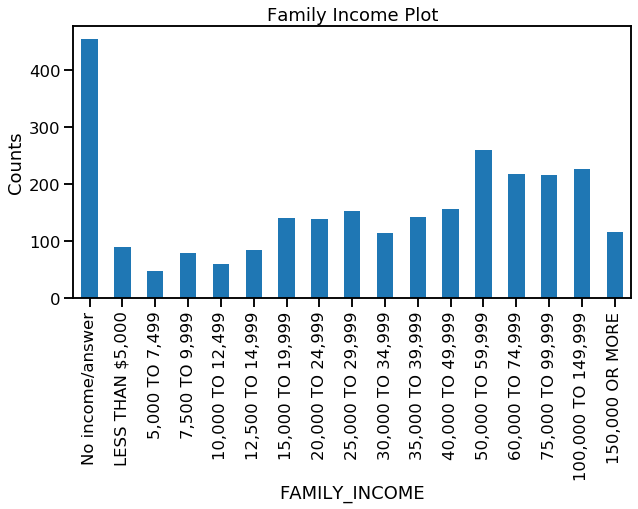

In [14]:
plt.figure(figsize=(10,5))
family_income = cps2019_df.groupby(cps2019_df['FAMILY_INCOME']).size()
family_income.plot.bar(rot=15, title='Family Income Plot')
plt.ylabel('Counts')
plt.xticks(range(0,len(Dict_Family_Income.values())), Dict_Family_Income.values(),rotation=90)
plt.show()

### Household type

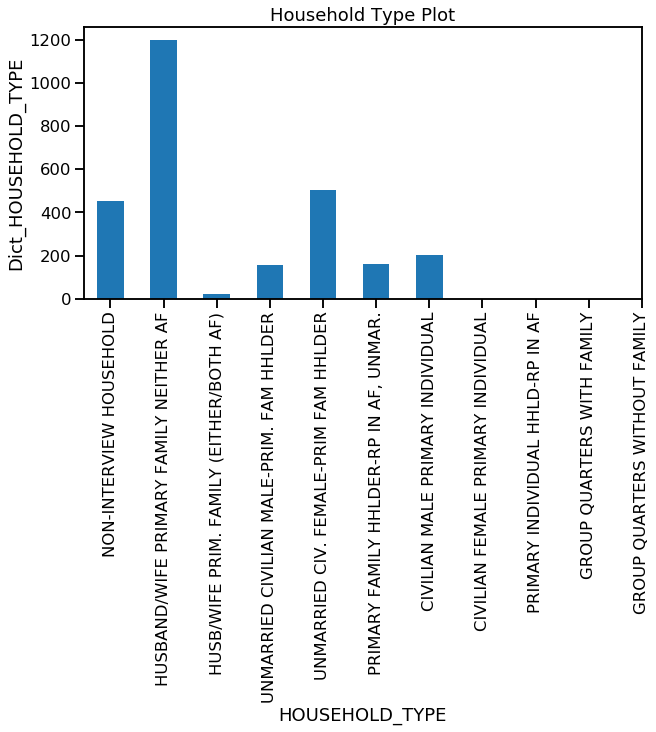

In [16]:
# Plotting based on Household type
plt.figure(figsize=(10,5))
Household_Type = cps2019_df.groupby(cps2019_df['HOUSEHOLD_TYPE']).size()
Household_Type.plot.bar(rot=15, title='Household Type Plot')
plt.ylabel('Dict_HOUSEHOLD_TYPE')
plt.xticks(range(0,len(Dict_Household_Type.values())), Dict_Household_Type.values(),rotation=90)
plt.show()

### Race Histogram

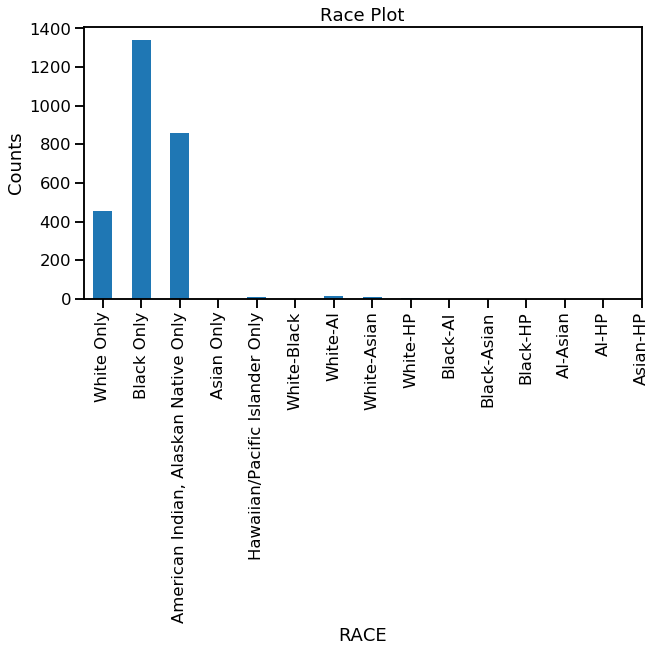

In [111]:
plt.figure(figsize=(10,5))
race = cps2019_df.groupby(cps2019_df['RACE']).size()
race.plot.bar(rot=15, title='Race Plot')
plt.ylabel('Counts')
plt.xticks(range(0,len(Dict_Race.values())), Dict_Race.values(),rotation=90)
# plt.ylim(0,100)
plt.show()

### Employment status pie chart

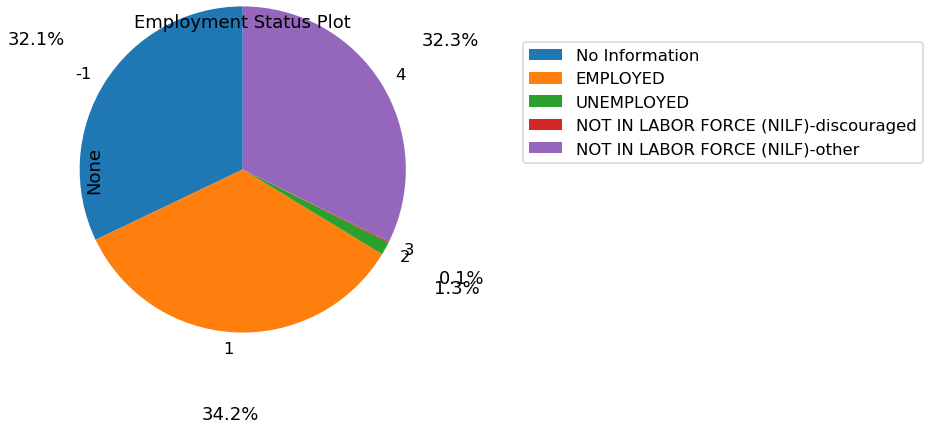

In [47]:
# Plotting Employment status
plt.figure(figsize=(20,5))
EMPLOYMENT_STATUS = cps2019_df.groupby(cps2019_df['EMPLOYMENT_STATUS']).size()
EMPLOYMENT_STATUS.plot.pie(title='Employment Status Plot',startangle=90, autopct='%1.1f%%',pctdistance = 1.5,radius = 1.5)
plt.legend(Dict_Employment_Status.values(),bbox_to_anchor=(1.5, 0, 0.5, 1))
plt.show()

### Precense of Children under 18 years old

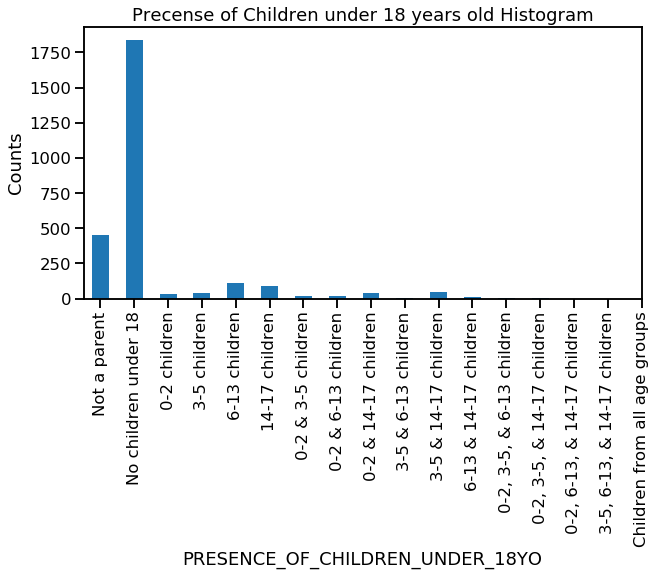

In [53]:
plt.figure(figsize=(10,5))
race = cps2019_df.groupby(cps2019_df['PRESENCE_OF_CHILDREN_UNDER_18YO']).size()
race.plot.bar(rot=15, title='Precense of Children under 18 years old Histogram')
plt.ylabel('Counts')
plt.xticks(range(0,len(Dict_ChildrenUnder18.values())), Dict_ChildrenUnder18.values(),rotation=90)
# plt.ylim(0,100)
plt.show()

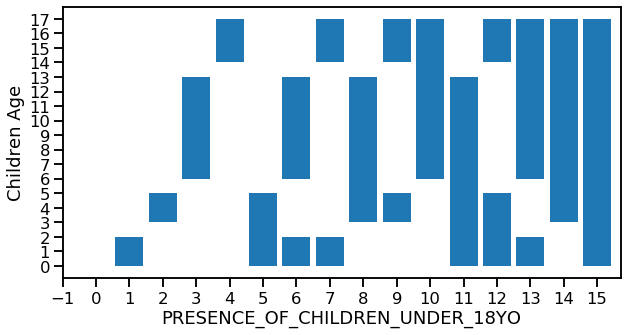

In [52]:
plt.figure(figsize=(10,5))
x = [1, 2, 3, 4, 5, 6, 6, 7, 7, 8, 9, 9, 10, 11, 12, 12, 13, 13, 14, 15]
y = [1, 4, 9.5, 15.5, 2.5, 1, 9.5, 1, 15.5, 8, 4, 15.5, 11.5, 6.5, 2.5, 15.5, 1, 11.5, 10, 8.5]
yerr = [1, 1, 3.5, 1.5, 2.5, 1, 3.5, 1, 1.5, 5, 1, 1.5, 5.5, 6.5, 2.5, 1.5, 1, 5.5, 7, 8.5]
plt.errorbar(x,y,yerr=yerr, linestyle='',elinewidth=28)
plt.xticks(np.arange(-1,16))
plt.yticks(np.arange(0,18))
plt.xlabel('PRESENCE_OF_CHILDREN_UNDER_18YO')
plt.ylabel('Children Age')
plt.show()

### Houselhold Purchases Groceries

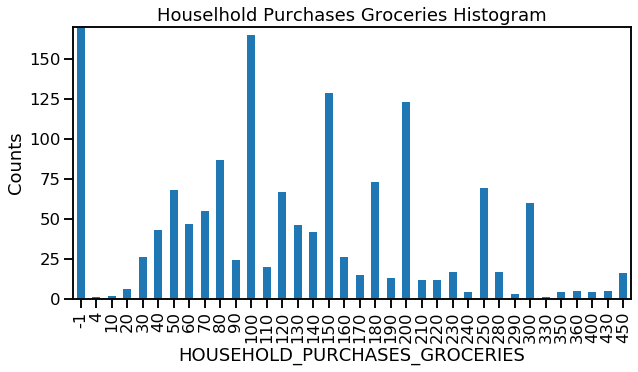

In [64]:
# HOUSEHOLD_PURCHASES_GROCERIES :
'''Out variable that represents the amount of money spent by the household on purchases at super-markets and grocery stores. Created from HUS2, HUS2CK1A, HUS2CK1B, HUS2COR. Top coded at 450.
EDITED UNIVERSE: HES1A = 1
VALID ENTRIES:
0: Coded as 0
1-7: Recoded as the midpoint, 4
8-400: Rounded to nearest 10 Dollars Note: 370 and 380 are collapsed into 380
390 and 400 are collapsed into 400
410 and 420 are collapsed into 420 -2 Don't Know
-3 Refused
-9 No Response'''
plt.figure(figsize=(10,5))
race = cps2019_df.groupby(cps2019_df['HOUSEHOLD_PURCHASES_GROCERIES']).size()
race.plot.bar(rot=15, title='Houselhold Purchases Groceries Histogram')
plt.ylabel('Counts')
plt.xticks(rotation=90)
#plt.xticks(range(0,len(Dict_.values())), Dict_.values(),rotation=90)
plt.ylim(0,170)
plt.show()

### Household Purchases Restaurants

In [65]:
# TO DO

# Old Plots from here below

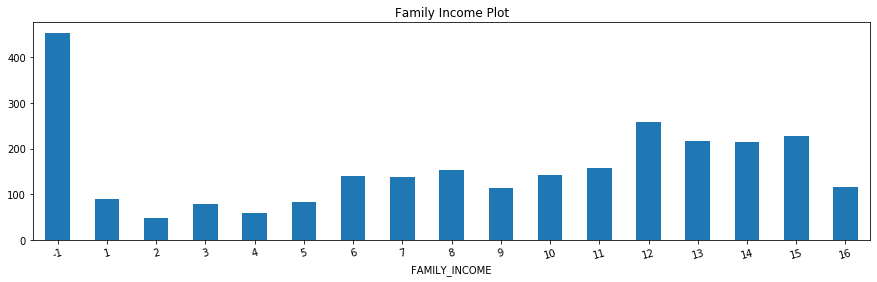

In [24]:
# Plotting based on family income
plt.figure(figsize=(15,4))
family_income = cps2019_df.groupby(cps2019_df['FAMILY_INCOME']).size()
family_income.plot.bar(rot=15, title='Family Income Plot')
# Key for family income:
# We need to add a legend to the plots to show what the numbers represent
# -1 represents no income/answer provided.  Don't remove
#1 LESS THAN $5,000
#2 5,000 TO 7,499
#3 7,500 TO 9,999
#4 10,000 TO 12,499
#5 12,500 TO 14,999
#6 15,000 TO 19,999
#7 20,000 TO 24,999
#8 25,000 TO 29,999
#9 30,000 TO 34,999
#10 35,000 TO 39,999
#11 40,000 TO 49,999
#12 50,000 TO 59,999
#13 60,000 TO 74,999
#14 75,000 TO 99,999
#15 100,000 TO 149,999
#16 150,000 OR MORE

In [25]:
cps2019_df.describe()

,Unnamed: 0,FAMILY_INCOME,HOUSEHOLD_TYPE,RACE,EMPLOYMENT_STATUS,PRESENCE_OF_CHILDREN_UNDER_18YO,HOUSEHOLD_PURCHASES_GROCERIES,HOUSEHOLD_PURCHASES_RESTAURANTS,AMOUNT_NEEDED_TO_MEET_HOUSEHOLD_FOOD_NEED,Y/N_RECEVIED_FOODBENEFITS_PAST12MONTHS,FOODSTAMPS_AMT_PERMONTH
count,2692.000000,2692.000000,2692.000000,2692.000000,2692.000000,2692.000000,2692.000000,2692.000000,2692.000000,2692.000000,2692.000000
mean,66444.942051,8.182021,2.259658,1.050149,1.341753,0.527489,70.842868,18.894874,7.050520,-0.211738,23.579866
std,41502.505514,5.622023,2.162611,1.156988,2.022687,2.105272,93.941181,38.398192,27.408583,1.256024,101.895535
min,2292.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-3.000000,-1.000000
25%,28334.750000,4.000000,1.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,69627.500000,9.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,108616.250000,13.000000,4.000000,2.000000,4.000000,0.000000,130.000000,30.000000,-1.000000,1.000000,-1.000000
max,138565.000000,16.000000,7.000000,8.000000,4.000000,14.000000,450.000000,290.000000,200.000000,2.000000,648.000000


In [26]:
cps2019_df = cps2019_df.rename(columns={'HEFAMINC':'FAMILY_INCOME','HRHTYPE':'HOUSEHOLD_TYPE', 
                        'PTDTRACE':'RACE', 'PREMPNOT':'EMPLOYMENT_STATUS', 
                        'PRCHLD':'PRESENCE_OF_CHILDREN_UNDER_18YO', 'HETS2O':'HOUSEHOLD_PURCHASES_GROCERIES', 
                        'HETS6O':'HOUSEHOLD_PURCHASES_RESTAURANTS', 
                        'HETS8CO': 'AMOUNT_NEEDED_TO_MEET_HOUSEHOLD_FOOD_NEED', 
                        'HETSP3O':'FOODSTAMPS_AMT_PERMONTH', 'HESP1':'Y/N_RECEVIED_FOODBENEFITS_PAST12MONTHS'})

In [27]:
cps2019_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692 entries, 0 to 2691
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Unnamed: 0                                 2692 non-null   int64
 1   FAMILY_INCOME                              2692 non-null   int64
 2   HOUSEHOLD_TYPE                             2692 non-null   int64
 3   RACE                                       2692 non-null   int64
 4   EMPLOYMENT_STATUS                          2692 non-null   int64
 5   PRESENCE_OF_CHILDREN_UNDER_18YO            2692 non-null   int64
 6   HOUSEHOLD_PURCHASES_GROCERIES              2692 non-null   int64
 7   HOUSEHOLD_PURCHASES_RESTAURANTS            2692 non-null   int64
 8   AMOUNT_NEEDED_TO_MEET_HOUSEHOLD_FOOD_NEED  2692 non-null   int64
 9   Y/N_RECEVIED_FOODBENEFITS_PAST12MONTHS     2692 non-null   int64
 10  FOODSTAMPS_AMT_PERMONTH                    2692 

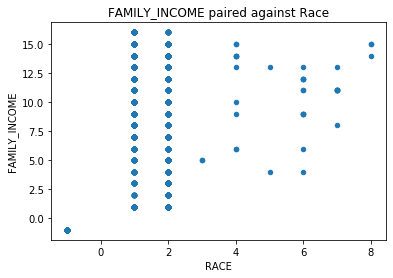

In [28]:
cps2019_df.plot.scatter(x='RACE', y='FAMILY_INCOME')
plt.title('FAMILY_INCOME paired against Race')
plt.xlabel('RACE')
plt.ylabel('FAMILY_INCOME')
plt.show()

# Race Key:
# 01 White Only
# 02 Black Only
# 03 American Indian, Alaskan Native Only
# 04 Asian Only
# 05 Hawaiian/Pacific Islander Only
# 06 White-Black
# 07 White-AI
# 08 White-Asian
# 09 White-HP
# 10 Black-AI
# 11 Black-Asian
# 12 Black-HP
# 13 AI-Asian
# 14 AI-HP
# 15 Asian-HP

#Will create histogram for race and family income later

In [29]:
#Reading in clean files
cps_path = '../../datasets/Mississipi/'
#cps_path = '/home/jovyan/Team_27_final_project/' # Uncomment for Drea
cps_csvfile = 'CPS_2020Data_MS.csv'
cps2020_df = pd.read_csv(cps_path + cps_csvfile)
cps2020_df.describe()

,Unnamed: 0,HEFAMINC,HRHTYPE,PTDTRACE,PREMPNOT,PRCHLD,HETS2O,HETS6O,HETS8CO,HESP1,HETSP3O
count,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000
mean,62751.026036,8.119527,2.304142,1.096252,1.388560,0.546351,76.966469,17.774359,7.106903,-0.092702,25.168442
std,38360.968961,5.688812,2.222837,1.461221,2.029213,2.251922,91.487963,37.173482,27.462553,1.309792,100.508814
min,2981.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-3.000000,-3.000000,-2.000000,-3.000000,-3.000000
25%,25882.500000,4.000000,1.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,57732.000000,9.000000,1.000000,1.000000,1.000000,0.000000,50.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,100463.500000,13.000000,4.000000,2.000000,4.000000,0.000000,150.000000,30.000000,-1.000000,1.000000,-1.000000
max,131679.000000,16.000000,10.000000,21.000000,4.000000,15.000000,350.000000,200.000000,200.000000,2.000000,648.000000


In [31]:
# Creating a list of 10 columns that we are going to keep
cps2020_df = cps2020_df.rename(columns={'HEFAMINC':'FAMILY_INCOME','HRHTYPE':'HOUSEHOLD_TYPE', 
                        'PTDTRACE':'RACE', 'PREMPNOT':'EMPLOYMENT_STATUS', 
                        'PRCHLD':'PRESENCE_OF_CHILDREN_UNDER_18YO', 'HETS2O':'HOUSEHOLD_PURCHASES_GROCERIES', 
                        'HETS6O':'HOUSEHOLD_PURCHASES_RESTAURANTS', 
                        'HETS8CO': 'AMOUNT_NEEDED_TO_MEET_HOUSEHOLD_FOOD_NEED', 
                        'HETSP3O':'FOODSTAMPS_AMT_PERMONTH', 'HESP1':'Y/N_RECEVIED_FOODBENEFITS_PAST12MONTHS'})

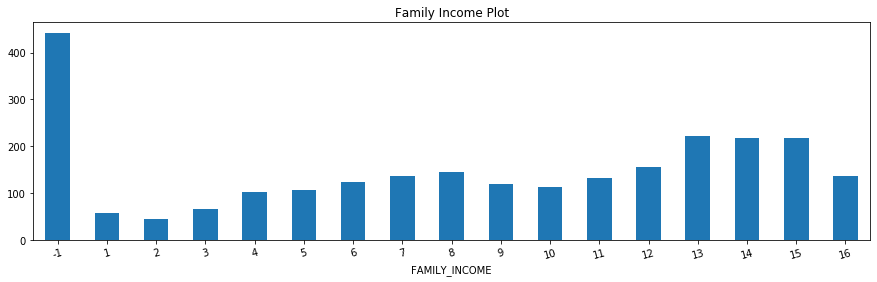

In [33]:
# Plotting based on family income
plt.figure(figsize=(15,4))
family_income_2020 = cps2020_df.groupby(cps2020_df['FAMILY_INCOME']).size()
family_income_2020.plot.bar(rot=15, title='Family Income Plot')
# Key for family income:
# We need to add a legend to the plots to show what the numbers represent
# -1 represents no income/answer provided.  Don't remove
#1 LESS THAN $5,000
#2 5,000 TO 7,499
#3 7,500 TO 9,999
#4 10,000 TO 12,499
#5 12,500 TO 14,999
#6 15,000 TO 19,999
#7 20,000 TO 24,999
#8 25,000 TO 29,999
#9 30,000 TO 34,999
#10 35,000 TO 39,999
#11 40,000 TO 49,999
#12 50,000 TO 59,999
#13 60,000 TO 74,999
#14 75,000 TO 99,999
#15 100,000 TO 149,999
#16 150,000 OR MORE

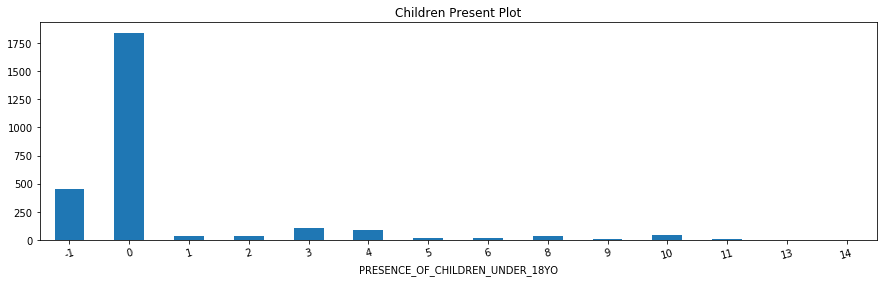

In [35]:
plt.figure(figsize=(15,4))
child_present = cps2019_df.groupby(cps2019_df['PRESENCE_OF_CHILDREN_UNDER_18YO']).size()
child_present.plot.bar(rot=15, title='Children Present Plot')
#Child Present
#-1 NIU (Not a parent)
#0 No own children under 18 years of age
#1 All own children 0- 2 years of age
#2 All own children 3- 5 years of age
#3 All own children 6-13 years of age
#4 All own children 14-17 years of age
#5 Own children 0- 2 and 3- 5 years of age (none 6-17)
#6 Own children 0- 2 and 6-13 years of age (none 3- 5 or 14-17)
#7 Own children 0- 2 and 14-17 years of age (none 3-13)
#8 Own children 3- 5 and 6-13 years of age (none 0- 2 or 14-17)
#9 Own children 3- 5 and 14-17 years of age (none 0- 2 or 6-13)
# 10 Own children 6-13 and 14-17 years of age (none 0- 5)
# 11 Own children 0- 2, 3- 5, and 6-13 years of age (none 14-17)
# 12 Own children 0- 2, 3- 5, and 14-17 years of age (none 6-13)
# 13 Own children 0- 2, 6-13, and 14-17 years of age (none 3- 5)
# 14 Own children 3- 5, 6-13, and 14-17

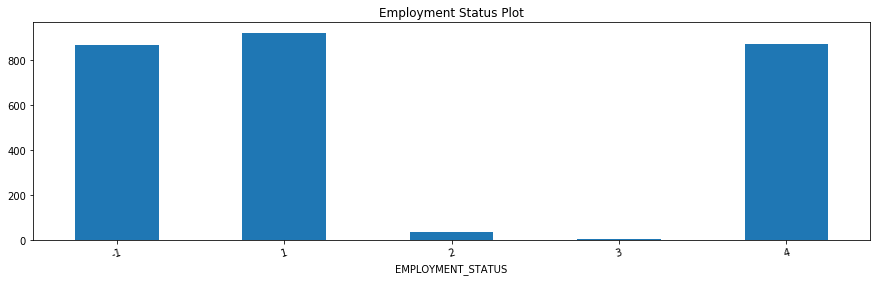

In [36]:
plt.figure(figsize=(15,4))
employment_status = cps2019_df.groupby(cps2019_df['EMPLOYMENT_STATUS']).size()
employment_status.plot.bar(rot=15, title='Employment Status Plot')

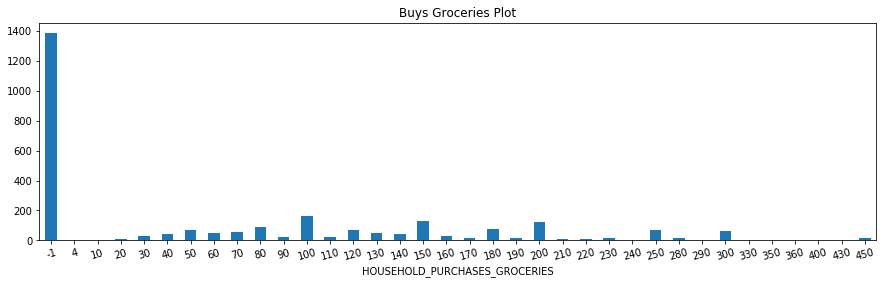

In [37]:
plt.figure(figsize=(15,4))
household_purchases_groceries = cps2019_df.groupby(cps2019_df['HOUSEHOLD_PURCHASES_GROCERIES']).size()
household_purchases_groceries.plot.bar(rot=15, title='Buys Groceries Plot')

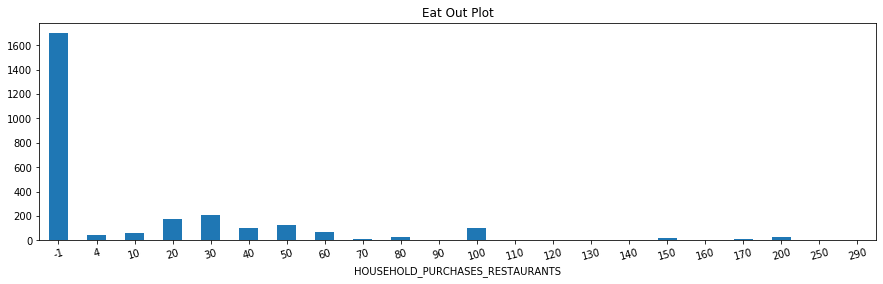

In [38]:
plt.figure(figsize=(15,4))
restaurants = cps2019_df.groupby(cps2019_df['HOUSEHOLD_PURCHASES_RESTAURANTS']).size()
restaurants.plot.bar(rot=15, title='Eat Out Plot')

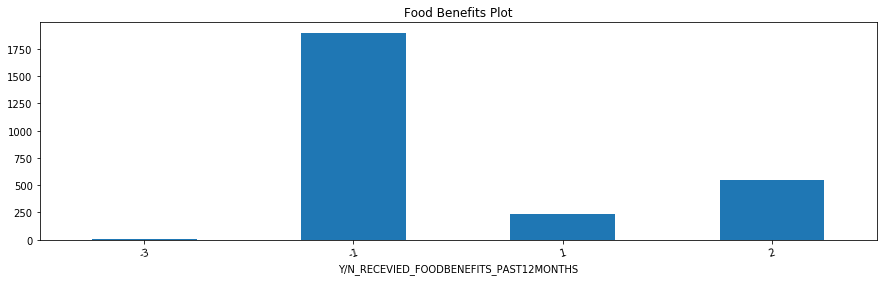

In [39]:
plt.figure(figsize=(15,4))
food_benefits = cps2019_df.groupby(cps2019_df['Y/N_RECEVIED_FOODBENEFITS_PAST12MONTHS']).size()
food_benefits.plot.bar(rot=15, title='Food Benefits Plot')

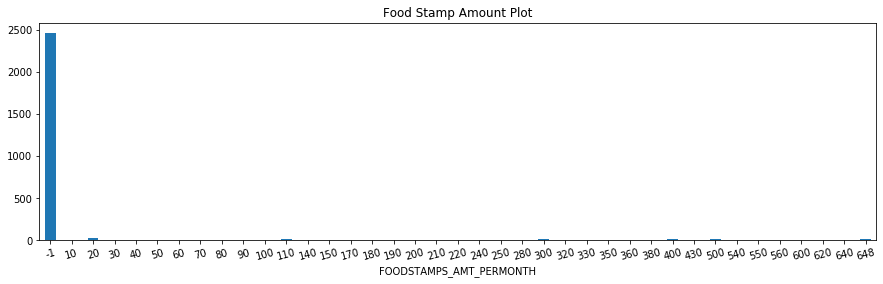

In [40]:
plt.figure(figsize=(15,4))
stamp_amount = cps2019_df.groupby(cps2019_df['FOODSTAMPS_AMT_PERMONTH']).size()
stamp_amount.plot.bar(rot=15, title='Food Stamp Amount Plot')